In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

from sklearn.model_selection import train_test_split

Mounted at /content/gdrive


In [ ]:
DataPrep = pd.read_parquet('/content/gdrive/My Drive/Ciência de dados/abt.csv', engine='pyarrow')

In [ ]:
DataPrep.head(5)

,Idade,NM_GENERO,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,Churn,ID_CLIENTE,Frequencia_Compra,VL_TOT_CONS_ESPORTES,VL_MED_CONS_ESPORTES,...,VL_RZ_U3M_U6M_ESPORTES,VL_RZ_U6M_U12M_ESPORTES,VL_RZ_U3M_U6M_LIVROS,VL_RZ_U6M_U12M_LIVROS,VL_RZ_U3M_U6M_ELETRONICOS,VL_RZ_U6M_U12M_ELETRONICOS,VL_RZ_U3M_U6M_ALIMENTOS,VL_RZ_U6M_U12M_ALIMENTOS,PK_DAT_PROC,PK_DATEREF
0,21,F,1331,1,Intermediário,1,1,2,227.0,113.0,...,1.0,1.00,1.0,1.05,1.0,0.89,NaN,1.0,2023-11-15,202311
1,21,M,1160,0,Intermediário,0,2,3,275.0,92.0,...,1.0,0.67,NaN,NaN,NaN,1.00,0.87,1.0,2023-11-15,202311
2,62,M,454,1,Básico,0,3,2,327.0,164.0,...,1.0,1.00,NaN,NaN,1.0,0.92,NaN,NaN,2023-11-15,202311
3,64,M,226,1,Intermediário,0,4,1,199.0,199.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.0,2023-11-15,202311
4,61,M,474,1,Avançado,0,5,4,436.0,109.0,...,NaN,NaN,NaN,NaN,1.0,1.00,NaN,NaN,2023-11-15,202311


In [ ]:
#Dividindo os dados para usar 70%
DataPrep1, DataPrep1Test = train_test_split(DataPrep, test_size = 0.3, random_state=42)

DataPrep1.shape, DataPrep1Test.shape

((700, 34), (300, 34))

In [ ]:
#Tirando os dados que não serão utilizados para a normalização.

NaoNormalizar = ['ID_CLIENTE', 'PK_DAT_PROC', 'PK_DATEREF','Churn']

DataPrep1 = DataPrep1.drop(axis=1, columns = NaoNormalizar)
DataPrep1.shape

(700, 30)

In [ ]:
def metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadados = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadados = metadados.sort_values(by='percent_nulos',ascending=False)
    metadados = metadados.reset_index(drop=True)

    return metadados

In [ ]:
metadados_df = metadata(DataPrep1)
metadados_df.head(50)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,VL_MED_U3M_CONS_ALIMENTOS,float64,485,69.29,129
1,VL_RZ_U3M_U6M_ALIMENTOS,float64,485,69.29,30
2,VL_RZ_U3M_U6M_LIVROS,float64,483,69.00,28
3,VL_MED_U3M_CONS_LIVROS,float64,483,69.00,127
4,VL_RZ_U3M_U6M_ESPORTES,float64,462,66.00,39
5,VL_MED_U3M_CONS_ESPORTES,float64,462,66.00,135
6,VL_RZ_U3M_U6M_ELETRONICOS,float64,460,65.71,23
7,VL_MED_U3M_CONS_ELETRONICOS,float64,460,65.71,134
8,VL_RZ_U6M_U12M_LIVROS,float64,426,60.86,71
9,VL_MED_U6M_CONS_LIVROS,float64,426,60.86,147


<Axes: >

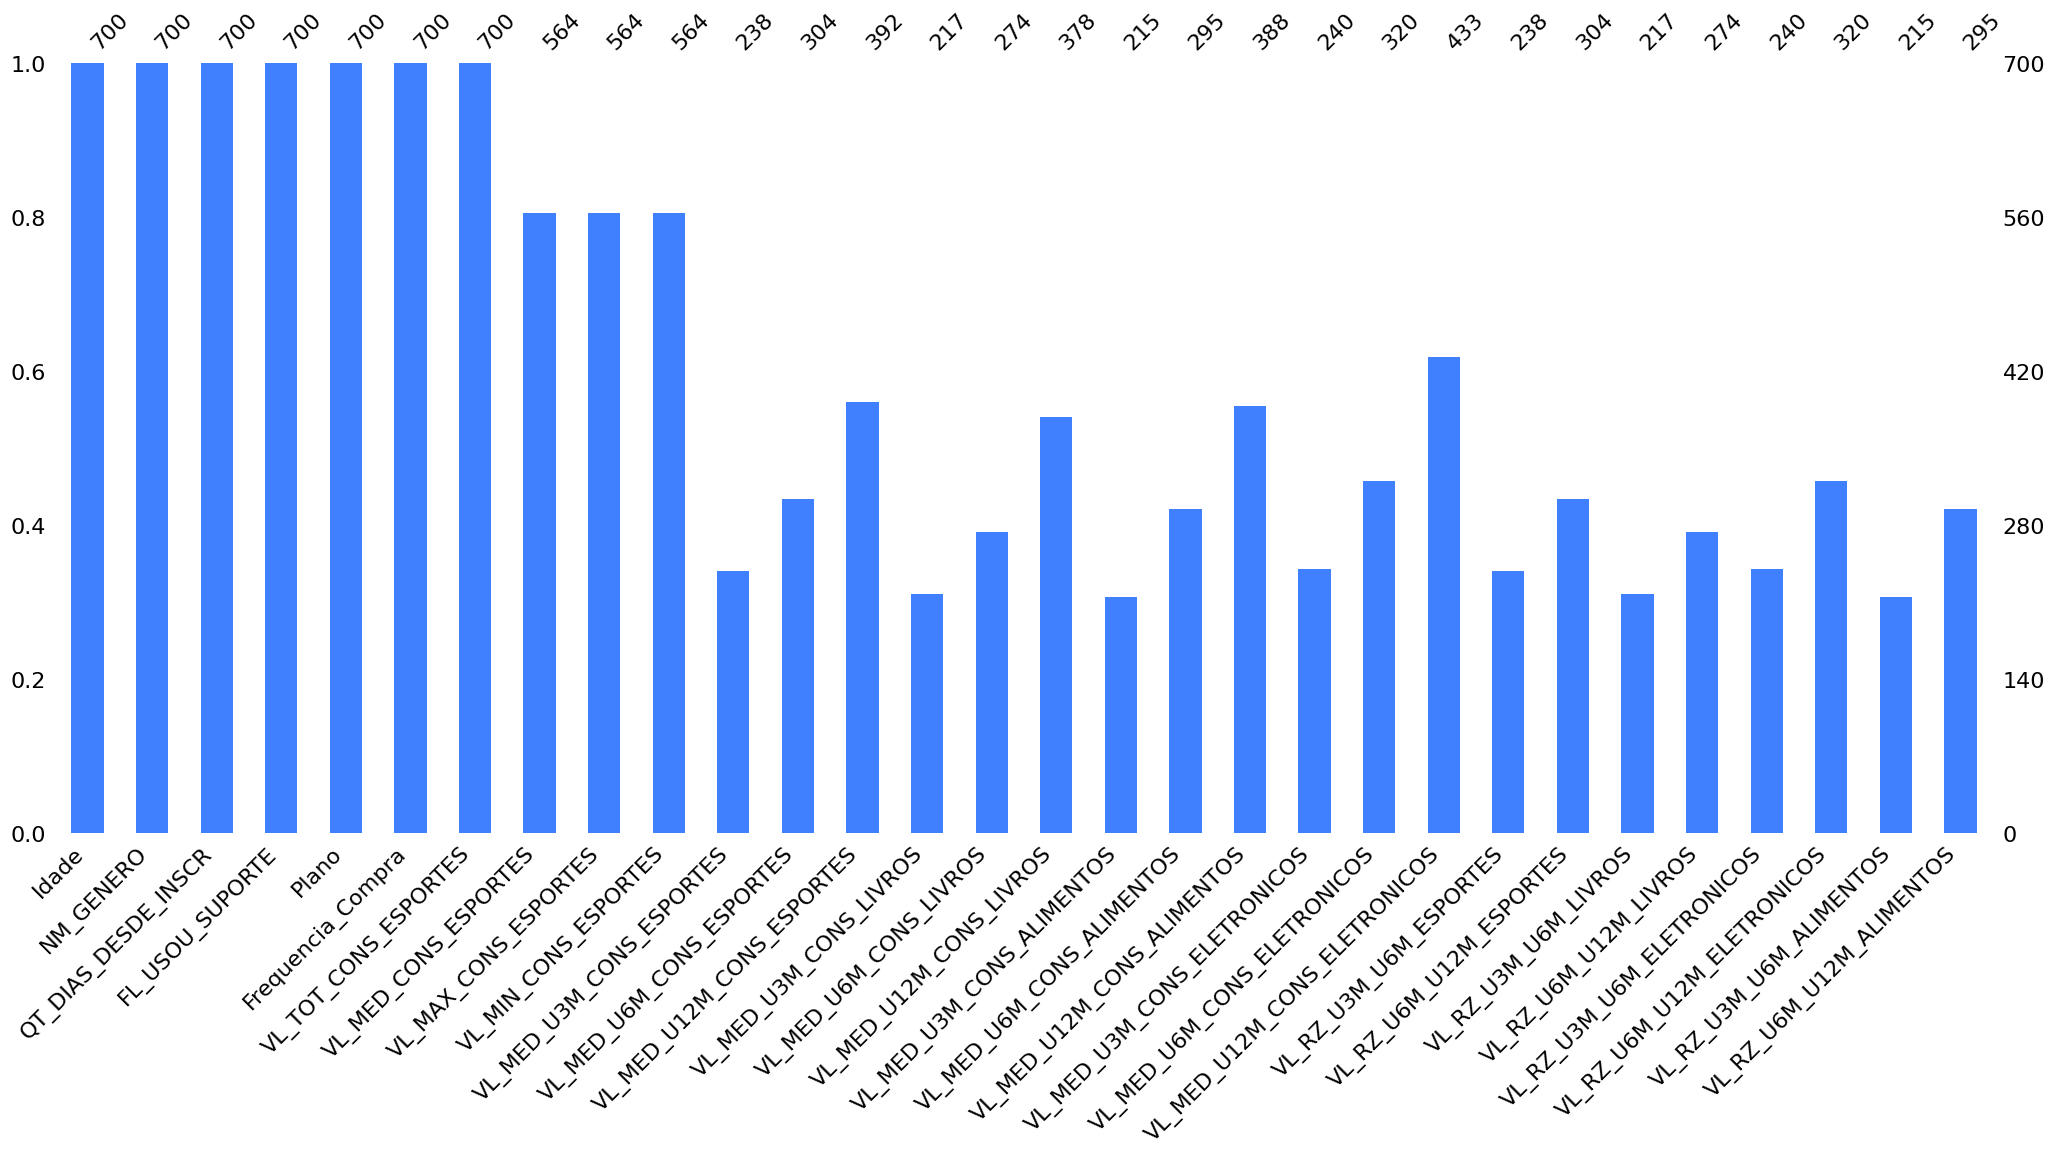

In [ ]:
import missingno as msn
msn.bar(DataPrep1, color=(0.25, 0.5, 1))

In [ ]:
#Criando Variável para excluir colunas com mais de 70% de dados nulos
missing_cutoff = 70
df_num_drop_nulos = metadados_df[(metadados_df['percent_nulos'] >= missing_cutoff)]
lista_drop_colunas = list(df_num_drop_nulos.nome_variavel.values)
lista_drop_colunas

[]

In [ ]:
#Excluindo essas colunas (Caso existam)
DataPrep2 = DataPrep1.drop(axis=1, columns = lista_drop_colunas)
DataPrep2.shape

(700, 30)

In [ ]:
#Preenchendo dados nulos com a média das variáveis
DataPrep2 = DataPrep2.fillna(DataPrep2.select_dtypes(include =['float64', 'int64', 'int32']).mean())
DataPrep2

,Idade,NM_GENERO,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,Frequencia_Compra,VL_TOT_CONS_ESPORTES,VL_MED_CONS_ESPORTES,VL_MAX_CONS_ESPORTES,VL_MIN_CONS_ESPORTES,...,VL_MED_U6M_CONS_ELETRONICOS,VL_MED_U12M_CONS_ELETRONICOS,VL_RZ_U3M_U6M_ESPORTES,VL_RZ_U6M_U12M_ESPORTES,VL_RZ_U3M_U6M_LIVROS,VL_RZ_U6M_U12M_LIVROS,VL_RZ_U3M_U6M_ELETRONICOS,VL_RZ_U6M_U12M_ELETRONICOS,VL_RZ_U3M_U6M_ALIMENTOS,VL_RZ_U6M_U12M_ALIMENTOS
541,67,F,997,0,Intermediário,0,0.0,101.228723,135.632979,66.528369,...,159.0000,159.000000,1.005798,1.000921,1.000000,1.000000,0.994292,1.000000,0.99814,1.000915
440,55,F,1777,1,Intermediário,1,17.0,17.000000,17.000000,17.000000,...,85.0000,85.000000,1.005798,1.000921,0.984378,0.999197,0.994292,1.000000,1.00000,1.000000
482,62,F,1721,1,Básico,6,464.0,77.000000,135.000000,17.000000,...,65.0000,69.000000,1.000000,1.000000,0.984378,0.999197,1.000000,0.940000,0.99814,1.000915
422,63,M,1690,0,Intermediário,0,0.0,101.228723,135.632979,66.528369,...,125.0000,134.000000,1.005798,1.000921,0.984378,0.999197,1.000000,0.930000,0.99814,1.000915
778,40,F,467,0,Avançado,0,0.0,101.228723,135.632979,66.528369,...,101.8625,103.325635,1.005798,1.000921,1.000000,1.000000,0.994292,0.989281,0.99814,1.000915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,43,M,197,0,Básico,1,32.0,32.000000,32.000000,32.000000,...,47.0000,47.000000,1.005798,1.000921,0.984378,0.999197,1.000000,1.000000,0.99814,0.840000
270,38,M,163,0,Básico,1,104.0,104.000000,104.000000,104.000000,...,101.8625,140.000000,1.005798,1.000921,1.000000,1.000000,0.994292,0.989281,0.99814,1.000915
860,20,M,783,1,Intermediário,3,404.0,135.000000,157.000000,115.000000,...,86.0000,86.000000,1.005798,1.000000,0.984378,1.000000,1.000000,1.000000,0.99814,1.000915
435,59,F,107,1,Básico,2,71.0,36.000000,42.000000,29.000000,...,101.8625,103.325635,1.000000,1.170000,1.560000,0.850000,0.994292,0.989281,0.99814,1.000915


<Axes: >

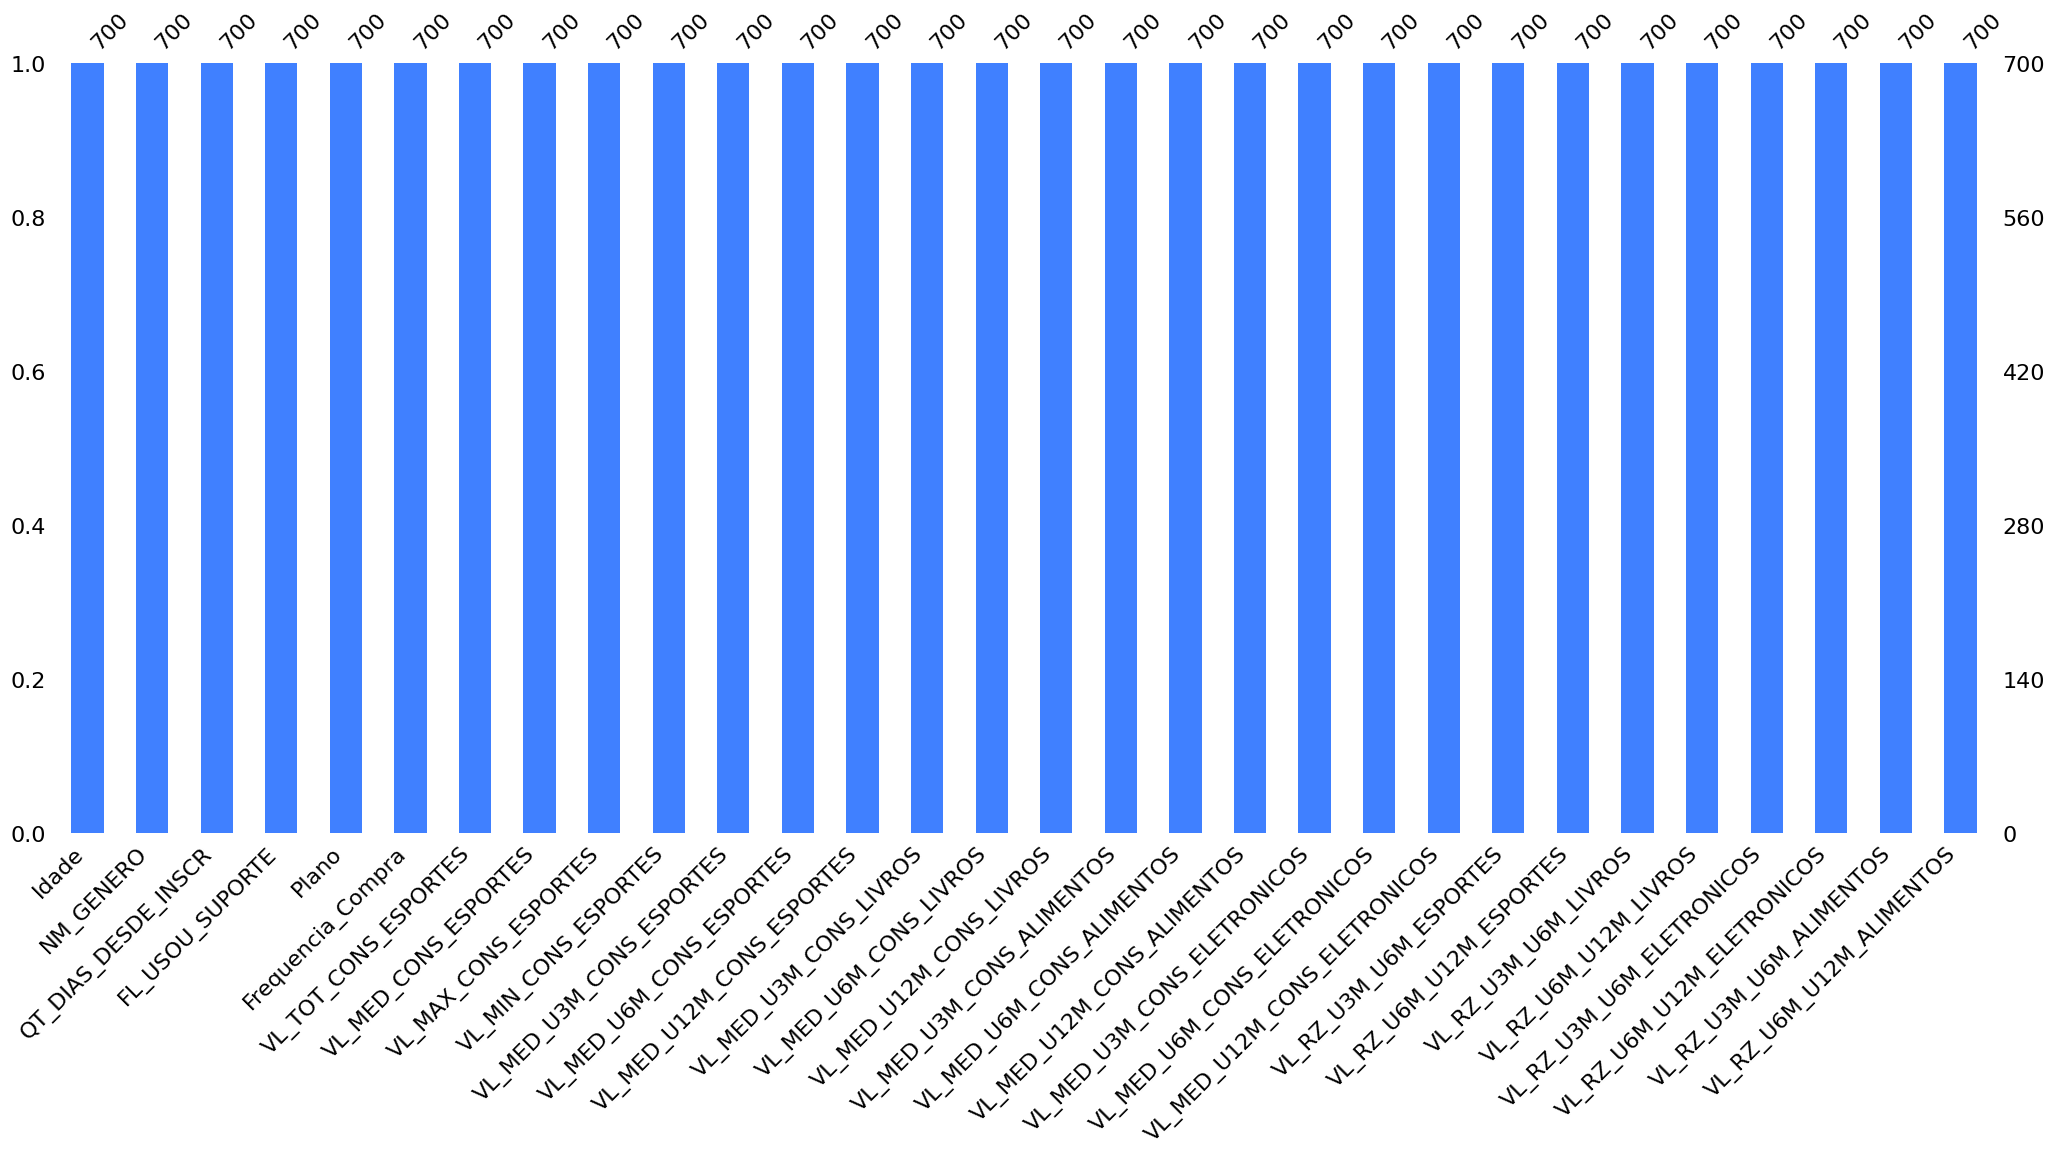

In [ ]:
msn.bar(DataPrep2, color =(0.25, 0.5, 1))

In [ ]:
categoria_columns = DataPrep2.select_dtypes(include=['object']).columns
DataPrep2[categoria_columns] = DataPrep2[categoria_columns].fillna('Desconhecido')
DataPrep2.shape

(700, 30)

In [ ]:
Norma1 = DataPrep2
Padro1 = DataPrep2

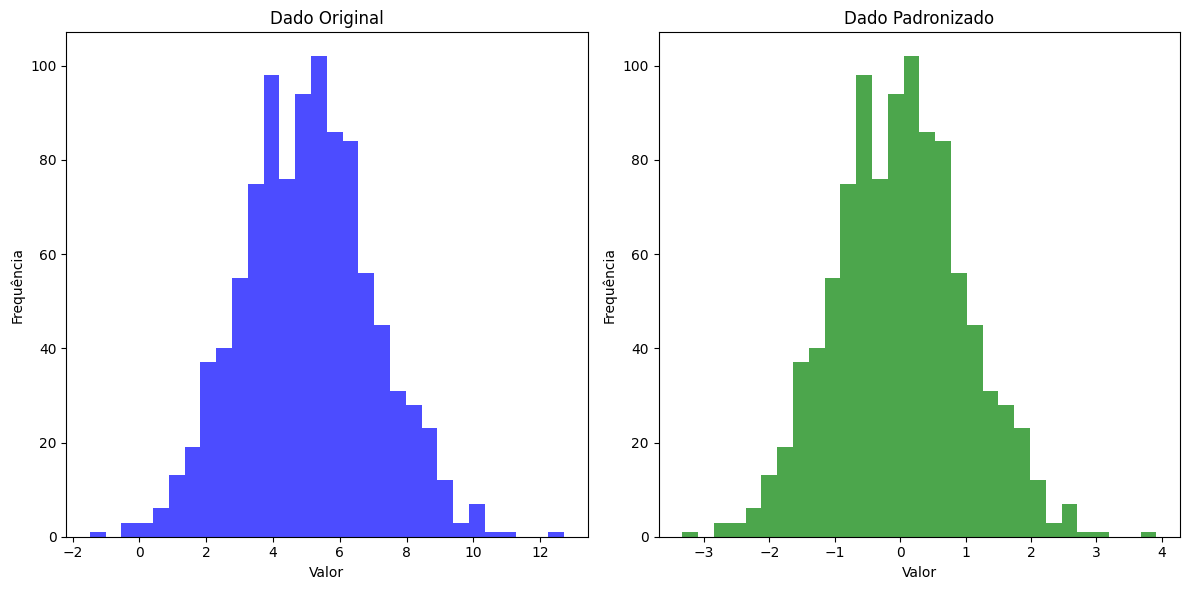

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Defindo semente para ter sempre os mesmo dados randomicos
np.random.seed(42)

#Gerando dados com distribuição normal. Tendo média de 5 e desvio padrão de 2
data = 5 + 2 * np.random.randn(1000)

#Padronização dos dados
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data.reshape(-1,1)).flatten()

#Visualizando as distribuições.
fig, ax = plt.subplots(1, 2, figsize=(12,6))

#Original dados
ax[0].hist(data, bins=30, color='blue', alpha=0.7)
ax[0].set_title("Dado Original")
ax[0].set_xlabel("Valor")
ax[0].set_ylabel("Frequência")

ax[1].hist(data_standardized, bins=30, color='green', alpha=0.7)
ax[1].set_title("Dado Padronizado")
ax[1].set_xlabel("Valor")
ax[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Selecionando colunas numéricas
colunas_numericas = Norma1.select_dtypes(include=['float64', 'int64', 'int32']).columns

#aplicando normalização
Norma1[colunas_numericas] = scaler.fit_transform(Norma1[colunas_numericas])
Norma1.shape

(700, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler

colunas = Padro1.select_dtypes(include= ['float64', 'int64', 'int32']).columns

#Aplicando a padronização
Padro1[colunas] = scaler.fit_transform(Padro1[colunas])
Padro1.shape

(700, 30)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

max_variavel = 2
df_categ_onehot = metadados_df[(metadados_df['cardinalidade'] <= max_variavel) & (metadados_df['tipo'] == 'object')]
lista_onehot = list(df_categ_onehot.nome_variavel.values)
print('Lista de vars para One Hot Encoding: ', lista_onehot)

encoder = OneHotEncoder(drop = 'first', sparse_output=False)

#aplicando encoding
encoded_dado = encoder.fit_transform(Padro1[lista_onehot])

#criando DF matendo índice original
encoded_cols = encoder.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_dado, columns=encoded_cols, index=Padro1.index)

Padro1 = pd.concat([Padro1.drop(lista_onehot, axis=1), encoded_df], axis=1)

Padro1.head(5)

Lista de vars para One Hot Encoding:  ['NM_GENERO']


,Idade,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,Frequencia_Compra,VL_TOT_CONS_ESPORTES,VL_MED_CONS_ESPORTES,VL_MAX_CONS_ESPORTES,VL_MIN_CONS_ESPORTES,VL_MED_U3M_CONS_ESPORTES,...,VL_MED_U12M_CONS_ELETRONICOS,VL_RZ_U3M_U6M_ESPORTES,VL_RZ_U6M_U12M_ESPORTES,VL_RZ_U3M_U6M_LIVROS,VL_RZ_U6M_U12M_LIVROS,VL_RZ_U3M_U6M_ELETRONICOS,VL_RZ_U6M_U12M_ELETRONICOS,VL_RZ_U3M_U6M_ALIMENTOS,VL_RZ_U6M_U12M_ALIMENTOS,NM_GENERO_M
541,0.960784,0.547253,0.0,Intermediário,0.000,0.000000,0.498594,0.669913,0.318800,0.480464,...,0.789744,0.415554,0.488507,0.562130,0.478947,0.483306,0.511236,0.460237,0.444345,0.0
440,0.725490,0.975824,1.0,Intermediário,0.125,0.016175,0.062176,0.061538,0.062176,0.480464,...,0.410256,0.415554,0.488507,0.552886,0.478525,0.483306,0.511236,0.461538,0.443878,0.0
482,0.862745,0.945055,1.0,Básico,0.750,0.441484,0.373057,0.666667,0.062176,0.154639,...,0.328205,0.411765,0.487952,0.552886,0.478525,0.487013,0.477528,0.460237,0.444345,0.0
422,0.882353,0.928022,0.0,Intermediário,0.000,0.000000,0.498594,0.669913,0.318800,0.480464,...,0.661538,0.415554,0.488507,0.552886,0.478525,0.487013,0.471910,0.460237,0.444345,1.0
778,0.431373,0.256044,0.0,Avançado,0.000,0.000000,0.498594,0.669913,0.318800,0.480464,...,0.504234,0.415554,0.488507,0.562130,0.478947,0.483306,0.505214,0.460237,0.444345,0.0


In [ ]:
max_variavel = 2
df_categ_labelenc = metadados_df[(metadados_df['cardinalidade'] > max_variavel) & (metadados_df['tipo'] == 'object')]
lista_lenc = list(df_categ_labelenc.nome_variavel.values)
print('Lista de vars para One Hot Encoding: ', lista_lenc)

Lista de vars para One Hot Encoding:  ['Plano']


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in lista_lenc:
  encoder = LabelEncoder()
  Padro1[col] = encoder.fit_transform(Padro1[col])

Padro1.head(5)

,Idade,QT_DIAS_DESDE_INSCR,FL_USOU_SUPORTE,Plano,Frequencia_Compra,VL_TOT_CONS_ESPORTES,VL_MED_CONS_ESPORTES,VL_MAX_CONS_ESPORTES,VL_MIN_CONS_ESPORTES,VL_MED_U3M_CONS_ESPORTES,...,VL_MED_U12M_CONS_ELETRONICOS,VL_RZ_U3M_U6M_ESPORTES,VL_RZ_U6M_U12M_ESPORTES,VL_RZ_U3M_U6M_LIVROS,VL_RZ_U6M_U12M_LIVROS,VL_RZ_U3M_U6M_ELETRONICOS,VL_RZ_U6M_U12M_ELETRONICOS,VL_RZ_U3M_U6M_ALIMENTOS,VL_RZ_U6M_U12M_ALIMENTOS,NM_GENERO_M
541,0.960784,0.547253,0.0,2,0.000,0.000000,0.498594,0.669913,0.318800,0.480464,...,0.789744,0.415554,0.488507,0.562130,0.478947,0.483306,0.511236,0.460237,0.444345,0.0
440,0.725490,0.975824,1.0,2,0.125,0.016175,0.062176,0.061538,0.062176,0.480464,...,0.410256,0.415554,0.488507,0.552886,0.478525,0.483306,0.511236,0.461538,0.443878,0.0
482,0.862745,0.945055,1.0,1,0.750,0.441484,0.373057,0.666667,0.062176,0.154639,...,0.328205,0.411765,0.487952,0.552886,0.478525,0.487013,0.477528,0.460237,0.444345,0.0
422,0.882353,0.928022,0.0,2,0.000,0.000000,0.498594,0.669913,0.318800,0.480464,...,0.661538,0.415554,0.488507,0.552886,0.478525,0.487013,0.471910,0.460237,0.444345,1.0
778,0.431373,0.256044,0.0,0,0.000,0.000000,0.498594,0.669913,0.318800,0.480464,...,0.504234,0.415554,0.488507,0.562130,0.478947,0.483306,0.505214,0.460237,0.444345,0.0


In [ ]:
abt_model = pd.merge(Padro1, DataPrep[['Churn']], left_index=True, right_index=True, how='inner')
abt_model.shape


(700, 31)